In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = "/home/shaunf/Documents/Computer/Code/projects/Massive_Vector_Field_Dynamical_Friction/ProcaAroundKerr/GWGenerator"+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,unmodded final position,modded final position,unmodded final separatrix,modded final separatrix,mismatch,faithfulness,snr2,DeltaNOrbits
0,10000000.0,10,1.020300e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,2.586820e-14,1.000000,8.511980,-1.371208e-09
1,10000000.0,10,1.148600e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,3.066436e-13,1.000000,8.511980,-1.278025e-08
2,10000000.0,10,1.277000e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,3.644640e-12,1.000000,8.511980,-1.237877e-07
3,10000000.0,10,1.405400e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,7.743350e-11,1.000000,8.511979,-9.897159e-07
4,10000000.0,10,1.533800e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,2.587806e-09,1.000000,8.511978,-6.561985e-06
5,10000000.0,10,1.662200e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,7.905482e-08,0.999999,8.511975,-3.701947e-05
6,10000000.0,10,1.790500e-18,4.83,0.2,0.9,Separatrix reached!,2.653876,2.653876,2.453876,2.453876,1.904275e-06,0.999992,8.511910,-1.820152e-04
7,100000.0,10,2.047297e-16,34.95,0.2,0.9,Separatrix reached!,2.528758,2.528454,2.328758,2.328454,9.970855e-01,0.030558,0.592865,5.067129e+02
8,100000.0,10,2.175676e-16,34.95,0.2,0.9,Separatrix reached!,2.528758,2.528111,2.328758,2.328111,9.982701e-01,0.020572,0.331024,1.151610e+03
9,100000.0,10,2.304054e-16,34.95,0.2,0.9,Separatrix reached!,2.528758,2.527567,2.328758,2.327567,9.988322e-01,0.011955,0.223924,2.267307e+03


In [ ]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,45)

In [ ]:
tmpdat = datframe[(datframe["e0"]==0.1)&(datframe["BHSpin"]==0.8)]
xdat = tmpdat["SMBHMASS"]
ydat = tmpdat["PROCAMASS"]
zdat = tmpdat["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,60)

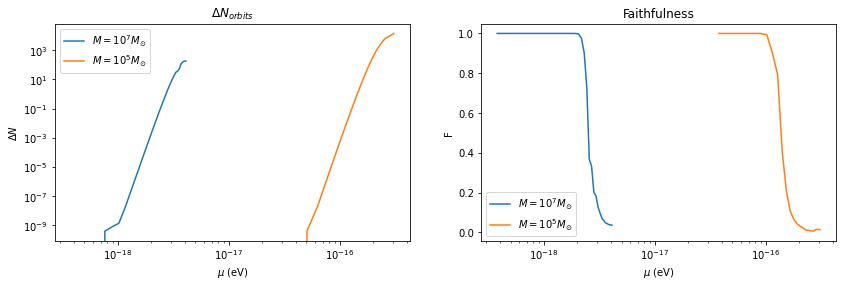

In [50]:
bhmass1 = 1e7
bhmass2 = 1e5
e0 = 0.2
bhspin = 0.9
newdat1 = datframe[(datframe["SMBHMASS"]==bhmass1)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat2 = datframe[(datframe["SMBHMASS"]==bhmass2)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat1 = newdat1.sort_values("PROCAMASS")
newdat2 = newdat2.sort_values("PROCAMASS")

xdat1 = newdat1["PROCAMASS"].values
wdat1 = np.abs(newdat1["DeltaNOrbits"]).values
zdat1 = newdat1["faithfulness"].values
xdat2 = newdat2["PROCAMASS"].values
wdat2 = np.abs(newdat2["DeltaNOrbits"]).values
zdat2 = newdat2["faithfulness"].values


fig,ax = plt.subplots(1,2,figsize=(14,4))
plt.subplots_adjust(hspace=0.5)
ax[0].plot(xdat1,wdat1,label="$M=10^7 M_{\odot}$");
ax[0].plot(np.append(xdat2[:18],xdat2[20]), np.append(wdat2[:18],wdat2[20]),label="$M=10^5 M_{\odot}$")
ax[0].legend()
ax[0].set_yscale("log");
ax[0].set_xscale("log")
ax[0].set_title("$\Delta N_{orbits}$")
ax[0].set_ylabel("$\Delta N$")
ax[0].set_xlabel("$\mu$ (eV)")




ax[1].plot(xdat1,zdat1,label="$M=10^7 M_{\odot}$");
ax[1].plot(xdat2,zdat2,label="$M=10^5 M_{\odot}$")
ax[1].legend()
ax[1].set_xscale("log")
ax[1].set_title("Faithfulness")
ax[1].set_ylabel("F")
ax[1].set_xlabel("$\mu$ (eV)")
ax[1].set_ylabel;